# Part 0. Installation of QuTiP and Qiskit

## 0.1 First steps

Two advanced libraries for quantum computing and quantum mechanics simulations in Python are QuTiP (Quantum Toolbox in Python) and Qiskit.

**Official websites**

[QuTiP](https://qutip.org/)

[Qiskit](https://quantum.cloud.ibm.com/docs/en/guides)

We will first need to install them since they weren't included in the environment we created on Week 1. To install both QuTiP and Qiskit, you can use pip or conda. As always, remember to activate the virtual environment dedicated to this course to avoid conflicts with other packages or projects.

Open a terminal and run the following command:

```bash
conda activate pyqm
pip install qutip qiskit 'qiskit[visualization]' 'qiskit-ibm-runtime' 'qiskit-aer>=0.11.0'
```

By running this command, pip will download and install the latest versions of QuTiP and Qiskit along with their dependencies.

To check the versions of the installed packages, you can run the following commands on a terminal:

```bash
pip show qutip
pip show qiskit
```

Or you can check the versions directly in a Jupyter Notebook by running the following code:

In [1]:

import qutip
print("QuTiP version:", qutip.__version__)

import qiskit
print("Qiskit version:", qiskit.__version__)

import numpy as np
print("Numpy version:", np.__version__)

import scipy
print("Scipy version:", scipy.__version__)

import matplotlib 
print("Matplotlib version:", matplotlib.__version__) # Matplotlib is not strictly required for QuTiP, but we will use it for visualization.

import sys  
print("Python version:", sys.version)

QuTiP version: 5.2.1
Qiskit version: 2.2.1
Numpy version: 2.2.6
Scipy version: 1.15.2
Matplotlib version: 3.9.4
Python version: 3.10.19 | packaged by conda-forge | (main, Oct 13 2025, 14:22:43) [Clang 19.1.7 ]


## 0.2 Testing the installation

### 0.2.1 QuTiP Test
To test if QuTiP is working correctly, you can run a simple example from the QuTiP documentation. For instance, you can create a two-level quantum system (a qubit) and visualize its state on the Bloch sphere:


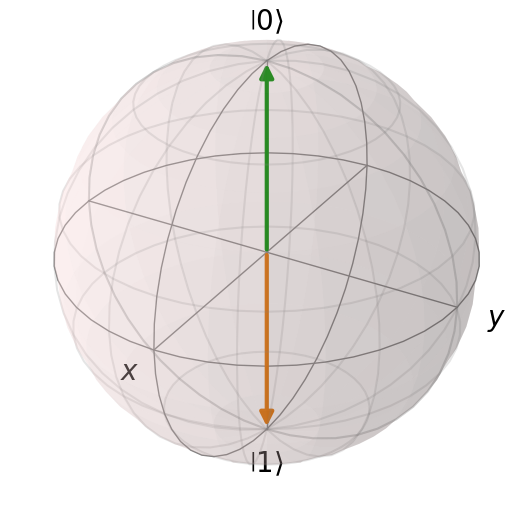

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from qutip import Bloch, basis

# Create a Bloch sphere
b = Bloch()

# Define the basis states
ket_0 = basis(2, 0)
ket_1 = basis(2, 1)

# Add the basis states to the Bloch sphere
b.add_states([ket_0, ket_1])

# Visualize the Bloch sphere
b.show()



If the Bloch sphere is displayed correctly, then QuTiP is installed and working properly!

### 0.2.2 Qiskit Test
To test if Qiskit is working correctly, you can run a simple example that creates a quantum circuit and simulates it. 
(Source: [Qiskit installation](https://pypi.org/project/qiskit/))


In [3]:
import numpy as np
from qiskit import QuantumCircuit

# 1. A quantum circuit for preparing the quantum state |000> + i |111> / √2
qc = QuantumCircuit(3)
qc.h(0)             # generate superposition
qc.p(np.pi / 2, 0)  # add quantum phase
qc.cx(0, 1)         # 0th-qubit-Controlled-NOT gate on 1st qubit
qc.cx(0, 2)         # 0th-qubit-Controlled-NOT gate on 2nd qubit

# 2. Define the observable to be measured 
from qiskit.quantum_info import SparsePauliOp
operator = SparsePauliOp.from_list([("XXY", 1), ("XYX", 1), ("YXX", 1), ("YYY", -1)])

# 3. Execute using the Estimator primitive
from qiskit.primitives import StatevectorEstimator
estimator = StatevectorEstimator()
job = estimator.run([(qc, operator)], precision=1e-3)
result = job.result()
print(f" > Expectation values: {result[0].data.evs}")

 > Expectation values: 4.000564739515184
